<a href="https://colab.research.google.com/github/Robotmcgregor/earth-analytics-python-env/blob/master/Working_with_tif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tif format

https://www.earthdatascience.org/courses/use-data-open-source-python/intro-raster-data-python/fundamentals-raster-data/intro-to-the-geotiff-file-format/

In [4]:
# Import necessary packages
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import rasterio as rio
import earthpy as et
import earthpy.plot as ep

# Prettier plotting with seaborn
sns.set(font_scale=1.5, style="whitegrid")

ModuleNotFoundError: ignored

In [5]:
pip install rasterio

     |████████████████████████████████| 18.2MB 60.0MB/s 


In [6]:
pip install earthpy

     |████████████████████████████████| 1.4MB 2.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 972kB 17.5MB/s 
     |████████████████████████████████| 14.7MB 313kB/s 
     |████████████████████████████████| 10.9MB 39.9MB/s 
  Created wheel for earthpy: filename=earthpy-0.9.2-cp36-none-any.whl size=1365087 sha256=3a02e0cf656a4e36eea791d637becd7d81689a671c129872a08c6cf00cce544c
  Stored in directory: /root/.cache/pip/wheels/27/f9/a5/026bb95ef7b12f9343b842da6897b4001c5b902550095cbbbe
Successfully built earthpy


In [16]:
import rasterio as rio
import earthpy as et
import earthpy.plot as ep

# Prettier plotting with seaborn
sns.set(font_scale=1.5, style="whitegrid")

In [8]:
lidar_path = ("/content/drive/My Drive/earth-analytics/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif")

In [9]:
with rio.open(lidar_path) as src:
  lidar_dem_im = src.read(1, masked=True)

In [13]:
print("shape: ", lidar_dem_im.shape)
print("shape ravel: ", lidar_dem_im.ravel().shape)

shape:  (2000, 4000)
shape ravel:  (8000000,)


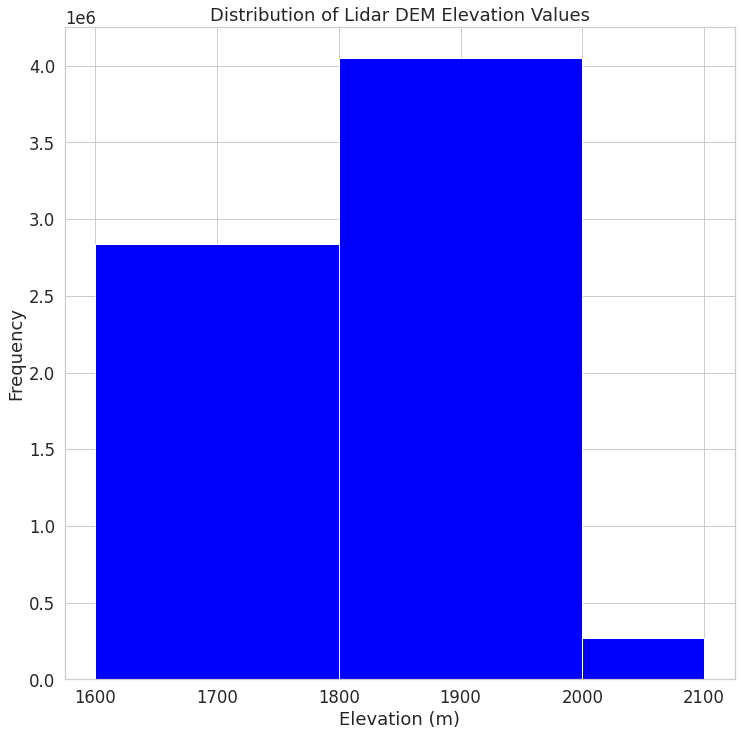

In [19]:
ep.hist(lidar_dem_im,
        colors=['blue'],
        title='Distribution of Lidar DEM Elevation Values',
        xlabel='Elevation (m)',
        ylabel='Frequency',
        #bins=10,
        bins=[1600, 1800, 2000, 2100])
plt.show()

#1. Coordinate Reference System

In [22]:
#import 
from shapely.geometry import Polygon, mapping
from rasterio.mask import mask
from rasterio.plot import show

In [23]:
print(src.crs)

EPSG:32613


In [30]:
DEM_crs = src.crs
DEM_crs

CRS.from_epsg(32613)

Converting EPSG to Proj4 in Python

A python package for this class called ‘earthpy’ contains a dictionary that will help you convert EPSG codes into a Proj4 string. This can be used with rasterio in order to determine the metadata for a given EPSG code. For example, if you wish to know the units of the EPSG code above, you can do the following:

In [25]:
print(list(et.epsg.keys())[:10])

['29188', '26733', '24600', '32189', '4899', '29189', '26734', '7402', '26951', '29190']


In [31]:
# convert to proj4 like so:
proj4 = et.epsg['32613']
print(proj4)

+proj=utm +zone=13 +datum=WGS84 +units=m +no_defs


In [32]:
# convert this into a rasterio CRS like so:
crs_proj4 = rio.crs.CRS.from_string(proj4)
crs_proj4

CRS.from_epsg(32613)

# Spatial Extent

In [33]:
src.bounds

BoundingBox(left=472000.0, bottom=4434000.0, right=476000.0, top=4436000.0)

#Raster Resolution

In [35]:
src.res

(1.0, 1.0)

i.e. the resolution is 1m x 1m